# KnapSack Extra Credit
## Brian Strickland
## COT 5405 - Spring 2020

## Description
The following codebase will allow a user to input any number of combinations of item values, weights and a bag limit to determine the optimal value that can be obtained using a "knapsack" with a given weight limit as well as what items are added. Once the program has finished processing, the user will be shown links to view step by step illustrations of how to obtain the optimal value as well as what is in the bag.

Optionally the user can navigate to [./user-guide.html](./user-guide.html) after the program has finished processing.

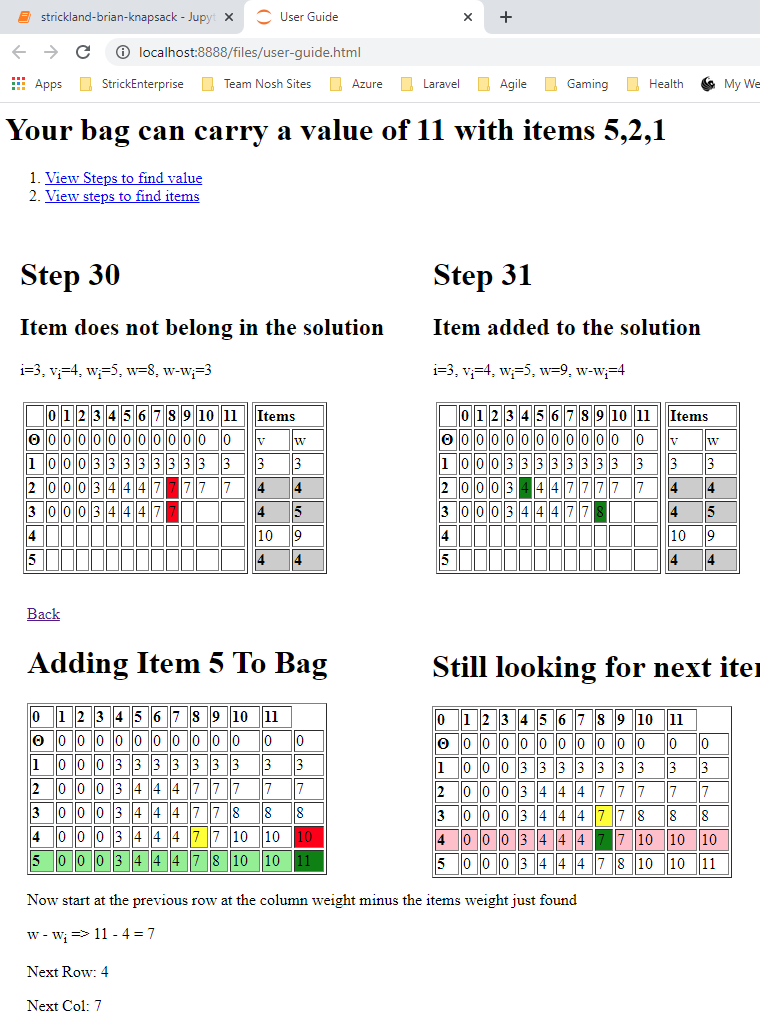

Future students will be able to use this on countless examples to help fully understand how and why this algorithim works.

### To use:
- Input (type or copy and paste) a space deliminted list of numbers that will represent the item values
- Click enter
- Input (type or copy and paste) a space deliminted list of numbers that will represent the item weights
- Click enter
- Enter in an integer that will represent the weight limit
- Click enter
    
### Example:
`Enter a list of items VALUES seperated by spaces: ` 1 6 18 22 28

`Enter a list of item WEIGHTS seperated by spaces: ` 1 2 5 6 7

`Enter the weight limit of the bag: ` 11

[./example.html](./example.html)

In [1]:
global learningMode
global currentStep
global fp
global valueStepsHtml
global bagItemsHtml
import copy
from IPython.core.display import display, HTML

def fillKnapsack(itemValues, itemWeights, bagWeightLimit):

    # Create a 2D array big enough to hold all item sets and weight
    bag = [['' for i in range(bagWeightLimit+1)] for j in range(len(itemValues)+1)]
        
    # Look at each item provided
    for i in range(len(itemValues)+1):

        # Calculate the values for a given combination at that current weight.
        for w in range(bagWeightLimit+1):

            # For a sack of weight 0 or an empty set of items
            if i == 0 or  w == 0:
                bag[i][w] = 0
     
            # If the current item is able to be in the solution, check to see
            elif itemWeights[i-1] <= w:

                proposedValue = itemValues[i-1] + bag[i-1][w-itemWeights[i-1]]

                # Item belongs in the solution
                if(proposedValue > bag[i-1][w]):
                    bag[i][w] = proposedValue
                    printHtmlStep(bagWeightLimit, bag, itemValues, itemWeights,i,w, True, i-1)
                # The item does not belong in the solution
                else:
                    bag[i][w] = bag[i-1][w]
                    printHtmlStep(bagWeightLimit, bag, itemValues, itemWeights,i,w, False, i-1)

            # Item does not belong in the solution 
            else:
                bag[i][w] = bag[i-1][w]
                printHtmlStep(bagWeightLimit, bag, itemValues, itemWeights, i,w, False, i-1)

    bagItems = findItems(bagWeightLimit, itemValues, itemWeights, bag[len(itemValues)][bagWeightLimit], bag)
    return [bag[len(itemValues)][bagWeightLimit], bagItems]

def findItems(w, item_values, item_weights, bagResult, bag):
    
    itemsInBag = []

    #Top to bottom search loop
    for i in range(len(item_weights), 0, -1):
    #while i >= 0:

        if(bagResult <= 0):
            break
            
        elif(bagResult == bag[i-1][w]):
            writeHtmlBagItems(bag, i, w, item_weights[i-1], True)
            continue
            
        #if(bag[i][w] != bag[i-1][w]):
        #if(bagResult != bag[i-1][w]):
            
        else:
            itemsInBag.append(i)
            writeHtmlBagItems(bag, i, w, item_weights[i-1], False)
            #i = i-1
            w = w - item_weights[i-1]
            bagResult -= item_values[i - 1]
        #else:
        #    i = i-1

    return itemsInBag

def printHtmlStep(W, bag, values, weights, i,w_small, in_solution, previousI):
    global currentStep
    global fp

    fp.write("<h1>Step " + str(currentStep) + "</h1>")
    if(not(in_solution)):
        fp.write("<h2>Item does not belong in the solution</h2>")
        #bag[i][w] = bag[i-1][w]
    else:
        fp.write("<h2>Item added to the solution</h2>")
    
    fp.write("<p>i=" + str(i) + ", ")
    fp.write("v<sub>i</sub>=" + str(values[i-1]) + ", ")
    fp.write("w<sub>i</sub>=" + str(weights[i-1]) + ", ")
    fp.write("w=" + str(w_small) + ", ")
    fp.write("w-w<sub>i</sub>=" + str(w_small-weights[i-1]) + "</p>")

    fp.write("<table width=\"300px\"><tr><td>")
    fp.write("<table width=\"225px\" border=\"1\"><tr>")
    
    fp.write("<td></td>")
    for row in range(W+1):
        fp.write("<td class=\"bold\">" + str(row) + "</td>")
    fp.write("</tr>")

    for row in range(len(values)+1):
        fp.write("<tr>")
        if(row == 0):
            fp.write("<td class=\"bold\">&Theta;</td>") 
        else:
            fp.write("<td class=\"bold\">" + str(row) + "</td>")
        for col in range(len(bag[row])):
            if(str(bag[row][col]) == ''):
                fp.write("<td>&nbsp;</td>")
            elif(not(in_solution) and row == previousI and col == w_small):
                fp.write("<td bgcolor=\"red\">" + str(bag[row][col]) + "</td>")
            elif(not(in_solution) and row == i and col == w_small):
                fp.write("<td bgcolor=\"red\">" + str(bag[row][col]) + "</td>") 
            elif(in_solution and row == previousI and col == w_small - weights[i-1]):
                fp.write("<td bgcolor=\"green\">" + str(bag[row][col]) + "</td>")
            elif(in_solution and row == i and col == w_small):
                fp.write("<td bgcolor=\"green\">" + str(bag[row][col]) + "</td>")
            else:
                fp.write("<td>" + str(bag[row][col]) + "</td>")
        fp.write("</tr>")

    fp.write("</table>")
    fp.write("</td>")
    fp.write("<td>")
    fp.write("<table border=\"1\" width=\"75px\">")
   

    fp.write("<tr><td class=\"bold\" colspan=\"2\">Items</td></tr>")
    fp.write("<tr><td>v</td><td>w</td></tr>")
    for item in range(len(values)):
        if(values[i-1] == values[item]):
            fp.write("<tr bgcolor=\"#ccc\"><td class=\"bold\">" + str(values[item]) + "</td><td class=\"bold\">" + str(weights[item]) + "</td></tr>")
        else:
            fp.write("<tr><td>" + str(values[item]) + "</td><td>" + str(weights[item]) + "</td></tr>")

    fp.write("</table></td></tr></table>")

    currentStep += 1
    
def writeHtmlBagItems(bag, i, w, addedItemWeight, stillLooking):
    
    if(stillLooking):
        findingItems.write("<h1>Still looking for next item...</h1>")
    else:
        findingItems.write("<h1>Adding Item " + str(i) + " To Bag</h1>")
    findingItems.write("<table border=\"1\" width=\"300px\">")
     
    findingItems.write("<tr>")
    findingItems.write("<td class=\"bold\">&nbsp;</td>")
    for row in range(len(bag[0])):
        findingItems.write("<td class=\"bold\">" + str(row) + "</td>")
    findingItems.write("</tr>")    
    
    colColor = ""
    rowColor = ""
    
    for row in range(len(bag)):
        
        # Highlight the item added to bag row
        if(i == row):
            if(not(stillLooking)):
                rowColor = "bgcolor=\"#90ee90\""
            else:
                rowColor = "bgcolor=\"pink\""
            
        findingItems.write("<tr " + rowColor + ">")
        
        # Add row column
        if(row == 0):
            findingItems.write("<td class=\"bold\">&Theta;</td>") 
        else:
            findingItems.write("<td class=\"bold\">" + str(row) + "</td>") 
        
        for col in range(len(bag[row])):          
            
            # The column that doesn't match that shows this item is added
            if(col == w and row == (i-1)):
                if(stillLooking):
                    colColor = "bgcolor=\"yellow\""
                else:
                    colColor = "bgcolor=\"red\""
                
            elif(col == w and row == i):
                colColor = "bgcolor=\"green\""
            elif(col == w-addedItemWeight and row == i-1 and not(stillLooking)):
                colColor = "bgcolor=\"yellow\""
                
            findingItems.write("<td " + colColor + ">" + str(bag[row][col]) + "</td>")
            colColor = ""
            
        findingItems.write("</tr>")
        rowColor = ""

    findingItems.write("</table>")
    findingItems.write("<p>Now start at the previous row at the column weight minus the items weight just found</p>")
    findingItems.write("<p>w - w<sub>i</sub> => " + str(w) + " - " + str(addedItemWeight) + " = " + str(w-addedItemWeight) + "</p>")
    findingItems.write("<p>Next Row: " + str(i-1) + "</p>")
    findingItems.write("<p>Next Col: " + str(w-addedItemWeight) + "</p>")
    
def displayHtml(handle, content):
    display(HTML(content))
    handle.write(content)

userGuide = open("./user-guide.html", "w")
fp = open("./finding-values.html", "w")
findingItems = open("./finding-items.html", "w")

currentStep = 1
learningMode = True
fp.write("<html><head><title>Example of Knapsack</title><style>.bold{font-weight:bold;}</style></head><body><a href=\"./user-guide.html\">Back</a>")
findingItems.write("<html><head><title>Finding Items Added to the Bag</title><style>.bold{font-weight:bold;}</style></head><body><a href=\"./user-guide.html\">Back</a>")

item_values = list(map(int,input("\nEnter a list of item VALUES seperated by spaces: (1 2 3 4 5) ").strip().split()))
item_weights = list(map(int,input("\nEnter a list of item WEIGHTS seperated by spaces: (5 4 3 2 1)").strip().split()))
bagLimit = int(input("Enter the weight limit of the bag: (i.e. 11)"))

#print("Values:")
#print(item_values)
#print("Weights:")
#print(item_weights)
#print("Max Weight: " + str(bagLimit))

print("Running knapsack... please wait for new browser window to open with results.")
results = fillKnapsack(item_values, item_weights, bagLimit)
bagValue = results[0]
bagItems = results[1]

userGuide.write("<html><head><title>User Guide</title></head><body>")
displayHtml(userGuide, "<h1>Your bag can carry a value of " + str(bagValue) + " with items " + ",".join(str(v) for v in bagItems) + "</h1>")
displayHtml(userGuide, "<ol><li><a href=\"./finding-values.html\" target=\"_blank\">View Steps to find value</a></li><li><a href=\"./finding-items.html\" target=\"blank\">View steps to find items</a></li></ol>")
displayHtml(userGuide, "<p>Item Values: " + ",".join(str(v) for v in item_values))
displayHtml(userGuide, "<p>Item Weights: " + ",".join(str(v) for v in item_weights))
displayHtml(userGuide, "<p>Bag Weight: " + str(bagLimit))
userGuide.write("</body>")
userGuide.write("</html>")



findingItems.write("</body></html>")

fp.write("</body></html>")
fp.close()
userGuide.close()
findingItems.close()

#fp = open("./finding-values.html", "r")
#display(HTML(fp.read()))
#fp.close()




#import webbrowser
#url = 'user-guide.html'
#webbrowser.open(url)


Enter a list of item VALUES seperated by spaces: (1 2 3 4 5) 2 3 4 5

Enter a list of item WEIGHTS seperated by spaces: (5 4 3 2 1)2 1 2 4
Enter the weight limit of the bag: (i.e. 11)11
Running knapsack... please wait for new browser window to open with results.
